In [14]:
import pandas as pd
df_yelp = pd.read_csv("yelp_data.csv")
df_stations = pd.read_csv('bike_stations_vitoria.csv')

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [20]:
df_yelp_full = pd.merge(df_yelp, df_stations, left_on="station_name", right_on="name", how="left")
df_yelp_full = df_yelp_full.drop(columns=["name"]) 
df_yelp_full.head()
df_yelp_full.sample(10)



,station_name,poi_name,category,rating,latitude_x,longitude_x,latitude_y,longitude_y,free_bikes
576,Aquaviário - Vitória,Carnielli,Desserts,0.0,-20.317328,-40.299634,-20.318215,-40.294391,1
122,SOE Beira Mar - Vitória,Mister Cook,Restaurants,4.0,-20.315769,-40.312809,-20.318521,-40.321594,1
184,SICOOB Central - Vitória,Cantinho Verde Restaurante,Restaurants,0.0,-20.304291,-40.300289,-20.303622,-40.301387,2
665,EDP - Vitória,Restaurante Salade Verte,Restaurants,5.0,-20.311951,-40.299889,-20.311589,-40.303693,0
170,Prefeitura Municipal de Vitória - Vitória,Restaurante Salade Verte,Restaurants,5.0,-20.311951,-40.299889,-20.317976,-40.309655,0
392,Bairro Republica - Vitória,Nova Opção,Bars,0.0,-20.270370,-40.294102,-20.270618,-40.294112,1
3,Mercado da Vila Rubim - Vitória,Lanchonete e Caldo de Cana Avenida,Diners,0.0,-20.319300,-40.350010,-20.321076,-40.347709,2
246,Itararé - Vitória,Balacobaco Restaurante,Bars,5.0,-20.306490,-40.295502,-20.295944,-40.308043,0
640,Campus UFES - Vitória,Super Food,Restaurants,0.0,-20.280020,-40.299850,-20.279480,-40.301016,1
187,SICOOB Central - Vitória,Tirol Restaurante & Eventos,Restaurants,0.0,-20.303129,-40.300331,-20.303622,-40.301387,2


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

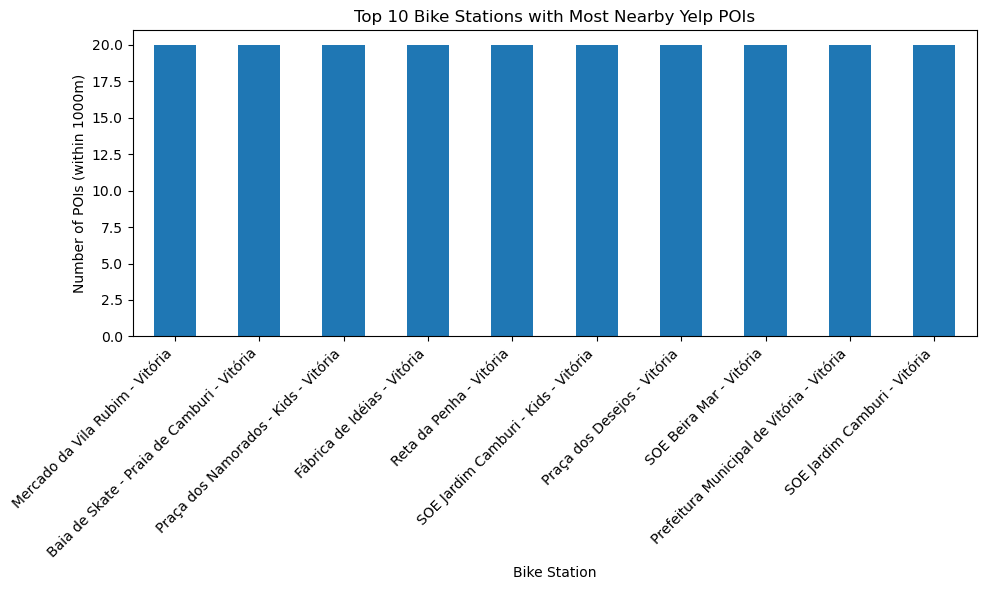

In [21]:
import matplotlib.pyplot as plt

poi_counts = df_yelp_full["station_name"].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
poi_counts.plot(kind='bar')
plt.title("Top 10 Bike Stations with Most Nearby Yelp POIs")
plt.xlabel("Bike Station")
plt.ylabel("Number of POIs (within 1000m)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

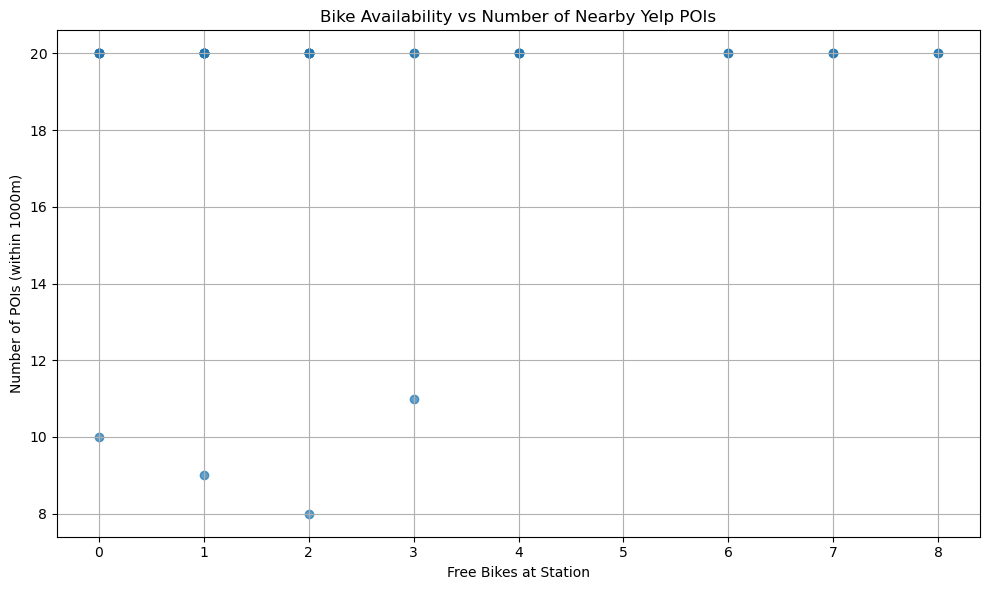

In [22]:
import matplotlib.pyplot as plt

poi_per_station = df_yelp_full.groupby("station_name").size().reset_index(name="poi_count")

station_bikes = df_yelp_full[["station_name", "free_bikes"]].drop_duplicates()
merged = pd.merge(poi_per_station, station_bikes, on="station_name")

plt.figure(figsize=(10, 6))
plt.scatter(merged["free_bikes"], merged["poi_count"], alpha=0.7)
plt.title("Bike Availability vs Number of Nearby Yelp POIs")
plt.xlabel("Free Bikes at Station")
plt.ylabel("Number of POIs (within 1000m)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [21]:
import sqlite3

conn = sqlite3.connect("data/bike_yelp_data.db")
cursor = conn.cursor()

df_yelp_full.to_sql("yelp_bike_data", conn, if_exists="replace", index=False)

conn.close()

Look at the data before and after the join to validate your data.

In [18]:
# BEFORE THE JOIN

print("Sample Yelp POI Data:")
print(df_yelp.sample(5))

print("\nSample Bike Stations Data:")
print(df_stations.sample(5))

Sample Yelp POI Data:
                        station_name                               poi_name  \
498         Grande Vitória - Vitória                             Pizza Duck   
583             Aquaviário - Vitória                                  Soeta   
497         Grande Vitória - Vitória  Buffet Jeová Raffa O Rei do Churrasco   
64           Reta da Penha - Vitória             Restaurante Praia do Canto   
8    Mercado da Vila Rubim - Vitória                 Restaurante Prato Fino   

        category  rating   latitude  longitude  
498        Pizza     0.0 -20.281570 -40.336601  
583  Restaurants     4.0 -20.304871 -40.294311  
497      Buffets     0.0 -20.304464 -40.351006  
64       Buffets     5.0 -20.295571 -40.290229  
8    Restaurants     4.0 -20.321016 -40.337582  

Sample Bike Stations Data:
                                    name   latitude  longitude  free_bikes
15  Praça dos Namorados - Kids - Vitória -20.300986 -40.291304           6
24            Ponte de Camburi 

In [19]:
# AFTER THE JOIN

print("\nSample of Joined Data (Bike Stations + Yelp POIs):")
print(df_yelp_full.sample(10))


Sample of Joined Data (Bike Stations + Yelp POIs):
                                   station_name  \
121                     SOE Beira Mar - Vitória   
126                     SOE Beira Mar - Vitória   
644                       Campus UFES - Vitória   
303        Praça dos Namorados - Kids - Vitória   
278                      UFES Maruípe - Vitória   
540   São Pedro I / Ilha das Caieiras - Vitória   
480                  Ponte de Camburi - Vitória   
660                               EDP - Vitória   
358                SOE Jardim Camburi - Vitória   
420  SICOOB - Praia de Camburi - Kids - Vitória   

                          poi_name     category  rating  latitude_x  \
121           Churrasqueiro Gilson      Buffets     0.0  -20.316610   
126       Fanfarra Buffet Infantil      Buffets     0.0  -20.312281   
644                   Café Madison       Diners     0.0  -20.279800   
303         Mais Opção Restaurante      Buffets     0.0  -20.298680   
278  Comércio de Alimentos Bona